In [7]:
## Tutorial: Transforming between coordinate systems
## From: http://learn.astropy.org/rst-tutorials/Coordinates-Transform.html?highlight=filtertutorials
## This code should allow me to transform between any coordinate systems I might need
from urllib.parse import urlencode
from urllib.request import urlretrieve

# Third-party dependencies
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
from astropy.time import Time

from IPython.display import Image

In [24]:
# Set up matplotlib and use a nicer set of plot parameters
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

In [25]:
## This line stores the location of the object (ra,dec) in icrs
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')  # using degrees directly
print(hcg7_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>


In [26]:
## If we enter it in the more "human" format it will have the same result
hcg7_center = SkyCoord('0h39m15.9s', '0d53m17.016s', frame='icrs')  # passing in string format
print(hcg7_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>


In [27]:
print(hcg7_center.ra)
print(hcg7_center.dec)

9d48m58.5s
0d53m17.016s


In [28]:
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')

In [29]:
## Transform to galactic "Quick reference form" long hand is below
hcg7_center.galactic

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

In [30]:
from astropy.coordinates import Galactic  # new coordinate baseclass
hcg7_center.transform_to(Galactic())

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

In [31]:
hcg7_center.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

In [32]:
hcg7_center_fk5 = hcg7_center.transform_to('fk5')
print(hcg7_center_fk5)

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (9.81625645, 0.88806155)>


In [33]:
from astropy.coordinates import FK5
hcg7_center_fk5.transform_to(FK5(equinox='J1975'))  # precess to a different equinox

<SkyCoord (FK5: equinox=J1975.000): (ra, dec) in deg
    (9.49565759, 0.75084648)>

In [34]:
## This should fail
hcg7_center.galactic.ra  # should fail because Galactic coordinates are l/b not RA/Dec

AttributeError: 'SkyCoord' object has no attribute 'ra'

In [35]:
## Call the elements produced directly
print(hcg7_center.galactic.l, hcg7_center.galactic.b)

116d28m32.0453s -61d49m51.581s


In [36]:
from astropy.coordinates import EarthLocation
from astropy.time import Time

In [37]:
## Here is where we start actually doing what I'm trying to do.
## The next section will focus on converting to Altittude and Azimuth
## Since these are referenced from Earth, we need to include a time and location 
## Time is referenced from UTC

# Kitt Peak, Arizona
kitt_peak = EarthLocation(lat='31d57.5m', lon='-111d35.8m', height=2096*u.m)

In [38]:
kitt_peak = EarthLocation.of_site('Kitt Peak')

In [39]:
#EarthLocation.get_site_names()

In [40]:
## Define time for observation
observing_time = Time('2010-12-21 1:00')
print(Time.now())

2019-07-30 20:50:37.885346


In [41]:
from astropy.coordinates import AltAz

## Full information for observation at this time and place
aa = AltAz(location=kitt_peak, obstime=observing_time)
print(aa)

<AltAz Frame (obstime=2010-12-21 01:00:00.000, location=(-1994502.60430614, -5037538.54232911, 3358104.99690298) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>


In [42]:
hcg7_center.transform_to(aa)

<SkyCoord (AltAz: obstime=2010-12-21 01:00:00.000, location=(-1994502.60430614, -5037538.54232911, 3358104.99690298) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (149.19234446, 55.05673074)>

In [43]:
hcg7_center.transform_to(aa).alt

<Latitude 55.05673074 deg>

[1.21992941 1.21421655 1.20885827 1.20384724 1.19917667 1.19484031
 1.19083239 1.18714763 1.18378121 1.18072876 1.17798633 1.17555042
 1.17341791 1.1715861  1.17005266 1.16881567 1.16787356 1.16722516
 1.16686966 1.16680661 1.16703592 1.1675579  1.16837319 1.16948281
 1.17088816 1.172591   1.17459349 1.17689817 1.17950797 1.18242623
 1.18565671 1.18920359 1.19307149 1.1972655  1.20179116 1.20665454
 1.21186216 1.21742114 1.22333911 1.22962431 1.23628559 1.24333242
 1.250775   1.2586242  1.26689168 1.2755899  1.28473216 1.29433269
 1.30440666 1.31497031 1.32604093 1.33763704 1.34977838 1.36248606
 1.37578264 1.38969225 1.40424068 1.41945558 1.43536653 1.45200524
 1.46940573 1.48760453 1.50664088 1.526557   1.54739832 1.56921382
 1.59205636 1.61598303 1.64105561 1.66734099 1.69491174 1.72384673
 1.75423172 1.78616023 1.81973434 1.85506572 1.89227675 1.9315018
 1.97288879 2.01660084 2.06281831 2.11174111 2.1635914  2.21861677
 2.27709394 2.33933321 2.40568363 2.47653925 2.55234662 2.63361

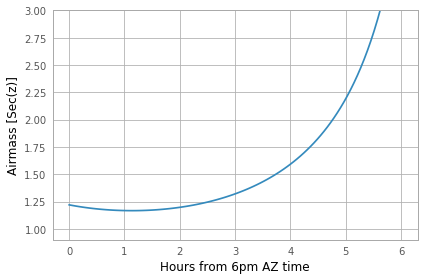

In [44]:
# this gives a Time object with an *array* of times
delta_hours = np.linspace(0, 6, 100)*u.hour
full_night_times = observing_time + delta_hours
full_night_aa_frames = AltAz(location=kitt_peak, obstime=full_night_times)
full_night_aa_coos = hcg7_center.transform_to(full_night_aa_frames)

plt.plot(delta_hours, full_night_aa_coos.secz)
plt.xlabel('Hours from 6pm AZ time')
plt.ylabel('Airmass [Sec(z)]')
plt.ylim(0.9,3)
plt.tight_layout()
print(full_night_aa_coos.secz)

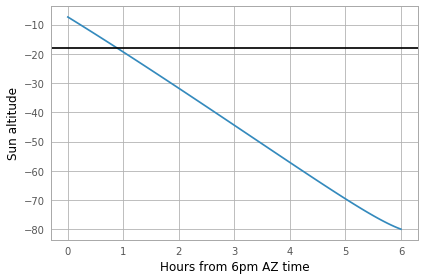

In [45]:
from astropy.coordinates import get_sun

full_night_sun_coos = get_sun(full_night_times).transform_to(full_night_aa_frames)
plt.plot(delta_hours, full_night_sun_coos.alt.deg)
plt.axhline(-18, color='k')
plt.xlabel('Hours from 6pm AZ time')
plt.ylabel('Sun altitude')
plt.tight_layout()

In [46]:
now = Time.now()
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')
kitt_peak_aa = AltAz(location=kitt_peak, obstime=now)
print(hcg7_center.transform_to(kitt_peak_aa))

<SkyCoord (AltAz: obstime=2019-07-30 20:50:41.532944, location=(-1994502.60430614, -5037538.54232911, 3358104.99690298) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (302.45450525, -39.27077655)>


In [47]:
full_night_aa_coos

<SkyCoord (AltAz: obstime=['2010-12-21 01:00:00.000' '2010-12-21 01:03:38.182'
 '2010-12-21 01:07:16.364' '2010-12-21 01:10:54.545'
 '2010-12-21 01:14:32.727' '2010-12-21 01:18:10.909'
 '2010-12-21 01:21:49.091' '2010-12-21 01:25:27.273'
 '2010-12-21 01:29:05.455' '2010-12-21 01:32:43.636'
 '2010-12-21 01:36:21.818' '2010-12-21 01:40:00.000'
 '2010-12-21 01:43:38.182' '2010-12-21 01:47:16.364'
 '2010-12-21 01:50:54.545' '2010-12-21 01:54:32.727'
 '2010-12-21 01:58:10.909' '2010-12-21 02:01:49.091'
 '2010-12-21 02:05:27.273' '2010-12-21 02:09:05.455'
 '2010-12-21 02:12:43.636' '2010-12-21 02:16:21.818'
 '2010-12-21 02:20:00.000' '2010-12-21 02:23:38.182'
 '2010-12-21 02:27:16.364' '2010-12-21 02:30:54.545'
 '2010-12-21 02:34:32.727' '2010-12-21 02:38:10.909'
 '2010-12-21 02:41:49.091' '2010-12-21 02:45:27.273'
 '2010-12-21 02:49:05.455' '2010-12-21 02:52:43.636'
 '2010-12-21 02:56:21.818' '2010-12-21 03:00:00.000'
 '2010-12-21 03:03:38.182' '2010-12-21 03:07:16.364'
 '2010-12-21 03:10:5

In [49]:
from astropy.coordinates import get_body


In [53]:
Winona = EarthLocation(lat='44.0554d', lon='-91.6664', height=202*u.m)
aa = AltAz(location=Winona, obstime=Time.now())
Bodies = ['sun', 'mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'moon']
#BodyAz = np.array([])
#BodyAlt = np.array([])
#for i in Bodies:
Bodycrd = get_body(Bodies, Time.now(), Winona).icrs
BodyAlt = Bodycrd.transform_to(aa).alt.deg
BodyAz = Bodycrd.transform_to(aa).az.deg

AttributeError: 'list' object has no attribute 'lower'

In [52]:
help(get_body)

Help on function get_body in module astropy.coordinates.solar_system:

get_body(body, time, location=None, ephemeris=None)
    Get a `~astropy.coordinates.SkyCoord` for a solar system body as observed
    from a location on Earth in the `~astropy.coordinates.GCRS` reference
    system.
    
    Parameters
    ----------
    body : str or other
        The solar system body for which to calculate positions.  Can also be a
        kernel specifier (list of 2-tuples) if the ``ephemeris`` is a JPL
        kernel.
    time : `~astropy.time.Time`
        Time of observation.
    location : `~astropy.coordinates.EarthLocation`, optional
        Location of observer on the Earth.  If not given, will be taken from
        ``time`` (if not present, a geocentric observer will be assumed).
    ephemeris : str, optional
        Ephemeris to use.  If not given, use the one set with
        ``astropy.coordinates.solar_system_ephemeris.set`` (which is
        set to 'builtin' by default).
    
    Ret

In [58]:
test =  np.array([1,2,3])
np.append(test,[4,5,6])

array([1, 2, 3, 4, 5, 6])

In [60]:
    Winona = EarthLocation(lat='44.0554d', lon='-91.6664', height=202*u.m)
    aa = AltAz(location=Winona, obstime=Time.now())
    Bodies = np.array(['sun', 'mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'moon'])
    BodyAz = np.array([])
    BodyAlt = np.array([])
    for i in Bodies:
        Bodycrd = get_body(i, Time.now(), Winona).icrs
        BodyAlt = np.append(BodyAlt,Bodycrd.transform_to(aa).alt.deg)
        BodyAz = np.append(BodyAz,Bodycrd.transform_to(aa).az.deg)

In [61]:
BodyAz

array([246.62242846, 258.61984677, 252.24966972, 231.76283025,
       111.10793592,  89.24848553, 314.41766927,   2.03790713,
       265.87508682])